In [1]:
from cs103 import *
from typing import NamedTuple, List
import csv


CountryVac = NamedTuple("CountryVac",[('location',str),
                                   ('date',str),
                                   ('vaccine',str),
                                   ('total_vaccinations_vac',int)])

#interp. contry's name, date, vaccine, total vaccinations for each vaccine
MAustria = CountryVac("Austria","2021-07-23","Moderna",936833)
PBulgaria = CountryVac("Bulgaria","2021-07-23","Pfizer/BioNTech",1127926)
CSChile = CountryVac("Chile","2021-07-24","CanSino",503032)
SChile = CountryVac("Chile","2021-07-24","Sinovac",18449253)

JFrance = CountryVac("France","2021-07-25","Johnson&Johnson",792855)
AGermany = CountryVac("Germany","2021-07-26","Oxford/AstraZeneca",12400491)
SBHungary = CountryVac("Hungary","2021-07-23","Sinopharm/Beijing",2086559)
SVHungary = CountryVac("Hungary","2021-07-23","Sputnik V",1812976)

PItaly = CountryVac("Italy","2021-07-26","Pfizer/BioNTech",46683906)
MIceland = CountryVac("Iceland","2021-06-18","Moderna",34141)
SUruguay = CountryVac("Uruguay","2021-07-26","Sinovac",3191640)

@typecheck
#template based on compound(4 fields)
def fn_for_country_vac(cv: CountryVac)->...:
    return ...,(cv.location,
                cv.date,
                cv.vaccine,
                cv.total_vaccinations_vac)


# List[CountryVac]
# interp. a list of CountryVac

LOCV0 = []
LOCV1 = [MAustria,PBulgaria,CSChile,SChile]
LOCV2 = [JFrance,AGermany,SBHungary,SVHungary]
LOCV3 = [PItaly,MIceland,SUruguay]

@typecheck
#template based on arbitrary-sized, and the reference rule
def fn_for_locv(locv: List[CountryVac]) -> ...:
    #description for accumulator
    acc = ... #type:...
    for cv in locv:
        acc = ...,(fn_for_country_vac(cv),acc)
    return ...,(acc)

# Read Function

In [2]:
@typecheck
def read(filename: str) -> List[CountryVac]:
    """    
    reads information from the specified file and returns a list of CountryVac
    """
    #return [] 
    # Template from HtDAP
    # loc contains the result so far
    locv = [] # type: List[Country]

    with open(filename) as csvfile:
        
        reader = csv.reader(csvfile)
        next(reader)

        for row in reader:
            cv = CountryVac(row[0],row[1],row[2],parse_int(row[3]))
            locv.append(cv)
    
    return locv

# Helper Functions

In [3]:
def location(cv: CountryVac)->str:
    """
    enter a CountryVac, return cv.location
    """
    #return ""
    #template from CountryVac
    return cv.location

start_testing()
expect(location(MAustria),"Austria")
expect(location(PBulgaria),"Bulgaria")
expect(location(CSChile),"Chile")
summary()

3 of 3 tests passed


In [4]:
def list_location(locv:List[CountryVac])->List[str]:
    """
    enter a list of CountryVac, return a list of cv.location
    """
    #return []
    #template from List[CountryVac]
    #template based on arbitrary-sized, and the reference rule
    #acc contains all data about cv.location
    acc=[] #type:list
    for cv in locv:
        acc.append(location(cv))
    return acc

In [5]:
def countries_in_csv(los:List[str])->List[str]:
    """
    enter a list of CountryVac, return a list of cv.location eliminating the duplicate elements
    """
    #return []
    #template from List[CountryVac]
    #template based on arbitrary-sized, and the reference rule
    #acc contains all data about cv.location
    acc = []
    for s in los:
        if s not in acc:
            acc.append(s)
    return acc

In [6]:
countries_in_csv(list_location(read('country_vaccinations_by_manufacturer.csv')))
# country list in csv

['Austria',
 'Belgium',
 'Bulgaria',
 'Chile',
 'Croatia',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Estonia',
 'Finland',
 'France',
 'Germany',
 'Hungary',
 'Iceland',
 'Ireland',
 'Italy',
 'Japan',
 'Latvia',
 'Liechtenstein',
 'Lithuania',
 'Luxembourg',
 'Malta',
 'Netherlands',
 'Poland',
 'Portugal',
 'Romania',
 'Slovakia',
 'Slovenia',
 'Spain',
 'Sweden',
 'Switzerland',
 'United States',
 'Uruguay']

In [7]:
#12 country have been chosen:
#The first ten countries have been chosen based on GDP by country:
#(data from: https://worldpopulationreview.com/countries/countries-by-gdp
# data source: International Monetary Fund: World Economic Outlook Database April 2019
#              United Nations: National Accounts Main Aggregates Database)
# the ten country have the largest economies in this csv file
#["United States", "Japan", "Germany", "France", "Italy", "Spain", "Netherlands", "Switzerland", "Poland", "Sweden"，"Hungary", "Chile"]
#["Hungary", "Chile"] because they have used different vaccines from those of the fist ten countries

@typecheck
def if_united_states(cv:CountryVac)->bool:
    """
    enter a country,return the data of a specific country
    """
    #return 0.0
    #template from CountryVac
    return cv.location == "United States"

start_testing()
expect(if_united_states(MAustria),False)
expect(if_united_states(PBulgaria),False)
expect(if_united_states(CSChile),False)
summary()

3 of 3 tests passed


In [8]:
@typecheck
def if_japan(cv:CountryVac)->bool:
    """
    enter a country,return the data of a specific country
    """
    #return 0.0
    #template from CountryVac
    return cv.location == "Japan"

start_testing()
expect(if_japan(SChile),False)
expect(if_japan(JFrance),False)
expect(if_japan(AGermany),False)
summary()

3 of 3 tests passed


In [9]:
@typecheck
def if_germany(cv:CountryVac)->bool:
    """
    enter a country,return the data of a specific country
    """
    #return 0.0
    #template from CountryVac
    return cv.location == "Germany"

start_testing()
expect(if_germany(MIceland),False)
expect(if_germany(SUruguay),False)
expect(if_germany(AGermany),True)
summary()

3 of 3 tests passed


In [10]:
@typecheck
def if_france(cv:CountryVac)->bool:
    """
    enter a country,return the data of a specific country
    """
    #return 0.0
    #template from CountryVac
    return cv.location == "France"

start_testing()
expect(if_france(JFrance),True)
expect(if_france(MIceland),False)
expect(if_france(PItaly),False)
summary()

3 of 3 tests passed


In [11]:
@typecheck
def if_italy(cv:CountryVac)->bool:
    """
    enter a country,return the data of a specific country
    """
    #return 0.0
    #template from CountryVac
    return cv.location == "Italy"

start_testing()
expect(if_italy(PItaly),True)
expect(if_italy(MIceland),False)
expect(if_italy(SUruguay),False)
summary()

3 of 3 tests passed


In [12]:
@typecheck
def if_spain(cv:CountryVac)->bool:
    """
    enter a country,return the data of a specific country
    """
    #return 0.0
    #template from CountryVac
    return cv.location == "Spain"

start_testing()
expect(if_spain(SBHungary),False)
expect(if_spain(SVHungary),False)
expect(if_spain(PItaly),False)
summary()

3 of 3 tests passed


In [13]:
@typecheck
def if_netherlands(cv:CountryVac)->bool:
    """
    enter a country,return the data of a specific country
    """
    #return 0.0
    #template from CountryVac
    return cv.location == "Netherlands"

start_testing()
expect(if_netherlands(MAustria),False)
expect(if_netherlands(MIceland),False)
expect(if_netherlands(SUruguay),False)
summary()

3 of 3 tests passed


In [14]:
@typecheck
def if_switzerland(cv:CountryVac)->bool:
    """
    enter a country,return the data of a specific country
    """
    #return 0.0
    #template from CountryVac
    return cv.location == "Switzerland"

start_testing()
expect(if_switzerland(MAustria),False)
expect(if_switzerland(AGermany),False)
expect(if_switzerland(SUruguay),False)
summary()

3 of 3 tests passed


In [15]:
@typecheck
def if_poland(cv:CountryVac)->bool:
    """
    enter a country,return the data of a specific country
    """
    #return 0.0
    #template from CountryVac
    return cv.location == "Poland"

start_testing()
expect(if_poland(CSChile),False)
expect(if_poland(SBHungary),False)
expect(if_poland(PItaly),False)
summary()

3 of 3 tests passed


In [16]:
@typecheck
def if_sweden(cv:CountryVac)->bool:
    """
    enter a country,return the data of a specific country
    """
    #return 0.0
    #template from CountryVac
    return cv.location == "Sweden"

start_testing()
expect(if_sweden(CSChile),False)
expect(if_sweden(SBHungary),False)
expect(if_sweden(PItaly),False)
summary()

3 of 3 tests passed


In [17]:
#["Hungary", "Chile"]
@typecheck
def if_hungary(cv:CountryVac)->bool:
    """
    enter a country,return the data of a specific country
    """
    #return 0.0
    #template from CountryVac
    return cv.location == "Hungary"

start_testing()
expect(if_hungary(CSChile),False)
expect(if_hungary(SBHungary),True)
expect(if_hungary(PItaly),False)
summary()

3 of 3 tests passed


In [18]:
#["Hungary", "Chile"]
@typecheck
def if_chile(cv:CountryVac)->bool:
    """
    enter a country,return the data of a specific country
    """
    #return 0.0
    #template from CountryVac
    return cv.location == "Chile"

start_testing()
expect(if_chile(CSChile),True)
expect(if_chile(SBHungary),False)
expect(if_chile(PItaly),False)
summary()

3 of 3 tests passed


In [19]:
@typecheck
def list_usa(locv:List[CountryVac])->List[CountryVac]:
    """
    enter a list of CompleteCountry, return a list of a specific country
    """
    #return []
    #template from List[CountryVac]
    #template based on arbitrary-sized, and the reference rule
    #acc contains all data of a specific country
    usa = [] #type:list
    for cv in locv:
        if if_united_states(cv):
            usa.append(cv)
    return usa

In [20]:
@typecheck
def list_jap(locv:List[CountryVac])->List[CountryVac]:
    """
    enter a list of CompleteCountry, return a list of a specific country
    """
    #return []
    #template from List[CountryVac]
    #template based on arbitrary-sized, and the reference rule
    #acc contains all data of a specific country
    jap = [] #type:list
    for cv in locv:
        if if_japan(cv):
            jap.append(cv)
    return jap

In [21]:
@typecheck
def list_ger(locv:List[CountryVac])->List[CountryVac]:
    """
    enter a list of CompleteCountry, return a list of a specific country
    """
    #return []
    #template from List[CountryVac]
    #template based on arbitrary-sized, and the reference rule
    #acc contains all data of a specific country
    ger = [] #type:list
    for cv in locv:
        if if_germany(cv):
            ger.append(cv)
    return ger

In [22]:
@typecheck
def list_fra(locv:List[CountryVac])->List[CountryVac]:
    """
    enter a list of CompleteCountry, return a list of a specific country
    """
    #return []
    #template from List[CountryVac]
    #template based on arbitrary-sized, and the reference rule
    #acc contains all data of a specific country
    fra = [] #type:list
    for cv in locv:
        if if_france(cv):
            fra.append(cv)
    return fra

In [23]:
@typecheck
def list_ita(locv:List[CountryVac])->List[CountryVac]:
    """
    enter a list of CompleteCountry, return a list of a specific country
    """
    #return []
    #template from List[CountryVac]
    #template based on arbitrary-sized, and the reference rule
    #acc contains all data of a specific country
    ita = [] #type:list
    for cv in locv:
        if if_italy(cv):
            ita.append(cv)
    return ita

In [24]:
@typecheck
def list_spa(locv:List[CountryVac])->List[CountryVac]:
    """
    enter a list of CompleteCountry, return a list of a specific country
    """
    #return []
    #template from List[CountryVac]
    #template based on arbitrary-sized, and the reference rule
    #acc contains all data of a specific country
    spa = [] #type:list
    for cv in locv:
        if if_spain(cv):
            spa.append(cv)
    return spa

In [25]:
@typecheck
def list_net(locv:List[CountryVac])->List[CountryVac]:
    """
    enter a list of CompleteCountry, return a list of a specific country
    """
    #return []
    #template from List[CountryVac]
    #template based on arbitrary-sized, and the reference rule
    #acc contains all data of a specific country
    net = [] #type:list
    for cv in locv:
        if if_netherlands(cv):
            net.append(cv)
    return net

In [26]:
@typecheck
def list_swi(locv:List[CountryVac])->List[CountryVac]:
    """
    enter a list of CompleteCountry, return a list of a specific country
    """
    #return []
    #template from List[CountryVac]
    #template based on arbitrary-sized, and the reference rule
    #acc contains all data of a specific country
    swi = [] #type:list
    for cv in locv:
        if if_switzerland(cv):
            swi.append(cv)
    return swi

In [27]:
@typecheck
def list_pol(locv:List[CountryVac])->List[CountryVac]:
    """
    enter a list of CompleteCountry, return a list of a specific country
    """
    #return []
    #template from List[CountryVac]
    #template based on arbitrary-sized, and the reference rule
    #acc contains all data of a specific country
    pol = [] #type:list
    for cv in locv:
        if if_poland(cv):
            pol.append(cv)
    return pol

In [28]:
@typecheck
def list_swe(locv:List[CountryVac])->List[CountryVac]:
    """
    enter a list of CompleteCountry, return a list of a specific country
    """
    #return []
    #template from List[CountryVac]
    #template based on arbitrary-sized, and the reference rule
    #acc contains all data of a specific country
    swe = [] #type:list
    for cv in locv:
        if if_sweden(cv):
            swe.append(cv)
    return swe

In [29]:
@typecheck
def list_hun(locv:List[CountryVac])->List[CountryVac]:
    """
    enter a list of CompleteCountry, return a list of a specific country
    """
    #return []
    #template from List[CountryVac]
    #template based on arbitrary-sized, and the reference rule
    #acc contains all data of a specific country
    hun = [] #type:list
    for cv in locv:
        if if_hungary(cv):
            hun.append(cv)
    return hun

In [30]:
@typecheck
def list_chi(locv:List[CountryVac])->List[CountryVac]:
    """
    enter a list of CompleteCountry, return a list of a specific country
    """
    #return []
    #template from List[CountryVac]
    #template based on arbitrary-sized, and the reference rule
    #acc contains all data of a specific country
    chi = [] #type:list
    for cv in locv:
        if if_chile(cv):
            chi.append(cv)
    return chi

In [31]:
def vaccine(cv: CountryVac)->str:
    """
    enter a CountryVac, return cv.location
    """
    #return ""
    #template from CountryVac
    return cv.vaccine

start_testing()
expect(vaccine(MAustria),"Moderna")
expect(vaccine(PBulgaria),"Pfizer/BioNTech")
expect(vaccine(CSChile),"CanSino")
summary()

3 of 3 tests passed


In [32]:
@typecheck
def list_vaccine(locv:List[CountryVac])->List[str]:
    """
    enter a list of CountryVac, return a list of cv.location
    """
    #return []
    #template from List[CountryVac]
    #template based on arbitrary-sized, and the reference rule
    #acc contains all data about cv.vaccine of a list of CountryVac
    acc=[] #type:list
    for cv in locv:
        acc.append(vaccine(cv))
    return acc

In [33]:
def organize_list_vaccine(los:List[str])->List[str]:
    """
    enter a list of CountryVac, return a reordered list of cv.location
    """
    #return []
    #template from List[CountryVac]
    #template based on arbitrary-sized, and the reference rule
    #acc contains all data about cv.vaccine of a list of CountryVac
    acc=[] #type:list
    for s in los:
        if s not in acc:
            acc.append(s)
        acc.sort()
    return acc

In [34]:
organize_list_vaccine(list_vaccine(read('country_vaccinations_by_manufacturer.csv')))
# vaccines used in the world

['CanSino',
 'Johnson&Johnson',
 'Moderna',
 'Oxford/AstraZeneca',
 'Pfizer/BioNTech',
 'Sinopharm/Beijing',
 'Sinovac',
 'Sputnik V']

In [35]:
@typecheck
def number_of_vaccines_use(locv:List[CountryVac])->List[int]:
    """
    enter a list of country,return the data of a specific country
    """
    #return []
    #template from List[CountryVac]
    #template based on arbitrary-sized, and the reference rule
    #acc contains all data about use rate of a specific country
    joh = 0 #type:int
    mod = 0 #type:int
    pfi = 0 #type:int
    ast = 0 #type:int
    sin = 0 #type:int
    can = 0 #type:int
    sino = 0 #type:int
    spu = 0 #type:int
    ['CanSino',
     'Johnson&Johnson',
     'Moderna',
     'Oxford/AstraZeneca',
     'Pfizer/BioNTech',
     'Sinopharm/Beijing',
     'Sinovac',
     'Sputnik V']
    for cv in locv[1:]:
        if cv.vaccine == "CanSino":
            if cv.total_vaccinations_vac > 0:
                can = cv.total_vaccinations_vac
        elif cv.vaccine == "Johnson&Johnson":
            if cv.total_vaccinations_vac > 0:
                joh = cv.total_vaccinations_vac
        elif cv.vaccine == "Moderna":
            if cv.total_vaccinations_vac > 0:
                mod = cv.total_vaccinations_vac
        elif cv.vaccine == "Oxford/AstraZeneca":
            if cv.total_vaccinations_vac > 0:
                ast = cv.total_vaccinations_vac
        elif cv.vaccine == "Pfizer/BioNTech":
            if cv.total_vaccinations_vac > 0:
                pfi = cv.total_vaccinations_vac
        elif cv.vaccine == "Sinopharm/Beijing":
            if cv.total_vaccinations_vac > 0:
                sino = cv.total_vaccinations_vac
        elif cv.vaccine == "Sinovac":
            if cv.total_vaccinations_vac > 0:
                sin = cv.total_vaccinations_vac
        elif cv.vaccine == "Sputnik V":
            if cv.total_vaccinations_vac > 0:
                spu = cv.total_vaccinations_vac

    return [can,joh,mod,ast,pfi,sino,sin,spu]

In [36]:
def sum_vaccines_use(loi:List[int])->int:
    """
    enter a list of int, return summation
    """
    #return []
    #template from List[int]
    #template based on arbitrary-sized
    #acc contains summation of numbers of vaccine
    acc = 0 #type:int
    for i in loi:
        acc = acc + i
    return acc
start_testing()
expect(sum_vaccines_use([1,2,3]),6)
expect(sum_vaccines_use([3,4,5]),12)
expect(sum_vaccines_use([1,4,3]),8)
summary()

3 of 3 tests passed


In [37]:
def vaccines_use_rate(loi:List[int])->List[float]:
    """
    enter a list of int, return a list of float(percentage)
    """
    #return []
    #template from List[CompleteCountry]
    #template based on arbitrary-sized
    #acc contains summation of numbers of vaccine
    acc = [] #type:list
    for f in lof:
        s = sum_vaccines_use(loi)
        acc.append(round((f/s)*100))
    return acc

In [38]:
def organize_vaccines_use_rate(lof:List[float])->List[float]:
    """
    enter a list of float, eliminate the invalid value (f == 0)
    """
    #return []
    #template from List[CompleteCountry]
    #template based on arbitrary-sized
    #acc contains summation of numbers of vaccine
    acc = []
    for f in lof:
        if not (f == 0):
            acc.append(f)
    return acc

# Analyze & Main Functions

In [39]:
import matplotlib.pyplot as plt
import numpy as np

@typecheck
def draw_pie_chart1(locv:List[CountryVac])->None:
    y = np.array(organize_vaccines_use_rate(number_of_vaccines_use(list_usa(locv))))
    mylabels = organize_list_vaccine(list_vaccine(list_usa(locv)))
    mycolors = ["#2F5D62", "#5E8B7E", "#A7C4BC", "#DFEEEA"]

    plt.pie(y, labels = mylabels, colors = mycolors, autopct='%1.1f%%')
    plt.legend(title = "Utilization of Vaccines in United States",bbox_to_anchor=(1.5, 1), loc='upper left', borderaxespad=0.)

    plt.show() 
    return

In [40]:
@typecheck
def draw_pie_chart2(locv:List[CountryVac])->None:
    y = np.array(organize_vaccines_use_rate(number_of_vaccines_use(list_jap(locv))))
    mylabels = organize_list_vaccine(list_vaccine(list_jap(locv)))
    mycolors = ["#2F5D62", "#5E8B7E", "#A7C4BC", "#DFEEEA"]

    plt.pie(y, labels = mylabels, colors = mycolors, autopct='%1.1f%%')
    plt.legend(title = "Utilization of Vaccines in Japan",bbox_to_anchor=(1.5, 1), loc='upper left', borderaxespad=0.)

    plt.show() 
    return

In [41]:
@typecheck
def draw_pie_chart3(locv:List[CountryVac])->None:
    y = np.array(organize_vaccines_use_rate(number_of_vaccines_use(list_ger(locv))))
    mylabels = organize_list_vaccine(list_vaccine(list_ger(locv)))
    mycolors = ["#2F5D62", "#5E8B7E", "#A7C4BC", "#DFEEEA"]

    plt.pie(y, labels = mylabels, colors = mycolors, autopct='%1.1f%%')
    plt.legend(title = "Utilization of Vaccines in Germany",bbox_to_anchor=(1.5, 1), loc='upper left', borderaxespad=0.)

    plt.show() 
    return

In [42]:
@typecheck
def draw_pie_chart4(locv:List[CountryVac])->None:
    y = np.array(organize_vaccines_use_rate(number_of_vaccines_use(list_fra(locv))))
    mylabels = organize_list_vaccine(list_vaccine(list_fra(locv)))
    mycolors = ["#2F5D62", "#5E8B7E", "#A7C4BC", "#DFEEEA"]

    plt.pie(y, labels = mylabels, colors = mycolors, autopct='%1.1f%%')
    plt.legend(title = "Utilization of Vaccines in France",bbox_to_anchor=(1.5, 1), loc='upper left', borderaxespad=0.)

    plt.show() 
    return

In [43]:
@typecheck
def draw_pie_chart5(locv:List[CountryVac])->None:
    y = np.array(organize_vaccines_use_rate(number_of_vaccines_use(list_ita(locv))))
    mylabels = organize_list_vaccine(list_vaccine(list_ita(locv)))
    mycolors = ["#2F5D62", "#5E8B7E", "#A7C4BC", "#DFEEEA"]

    plt.pie(y, labels = mylabels, colors = mycolors, autopct='%1.1f%%')
    plt.legend(title = "Utilization of Vaccines in Italy",bbox_to_anchor=(1.5, 1), loc='upper left', borderaxespad=0.)

    plt.show() 
    return

In [44]:
@typecheck
def draw_pie_chart6(locv:List[CountryVac])->None:
    y = np.array(organize_vaccines_use_rate(number_of_vaccines_use(list_spa(locv))))
    mylabels = organize_list_vaccine(list_vaccine(list_spa(locv)))
    mycolors = ["#2F5D62", "#5E8B7E", "#A7C4BC", "#DFEEEA"]

    plt.pie(y, labels = mylabels, colors = mycolors, autopct='%1.1f%%')
    plt.legend(title = "Utilization of Vaccines in Spain",bbox_to_anchor=(1.5, 1), loc='upper left', borderaxespad=0.)

    plt.show() 
    return

In [45]:
@typecheck
def draw_pie_chart7(locv:List[CountryVac])->None:
    y = np.array(organize_vaccines_use_rate(number_of_vaccines_use(list_net(locv))))
    mylabels = organize_list_vaccine(list_vaccine(list_net(locv)))
    mycolors = ["#2F5D62", "#5E8B7E", "#A7C4BC", "#DFEEEA"]

    plt.pie(y, labels = mylabels, colors = mycolors, autopct='%1.1f%%')
    plt.legend(title = "Utilization of Vaccines in Netherlands",bbox_to_anchor=(1.5, 1), loc='upper left', borderaxespad=0.)

    plt.show() 
    return

In [46]:
@typecheck
def draw_pie_chart8(locv:List[CountryVac])->None:
    y = np.array(organize_vaccines_use_rate(number_of_vaccines_use(list_swi(locv))))
    mylabels = organize_list_vaccine(list_vaccine(list_swi(locv)))
    mycolors = ["#2F5D62", "#5E8B7E", "#A7C4BC", "#DFEEEA"]

    plt.pie(y, labels = mylabels, colors = mycolors, autopct='%1.1f%%')
    plt.legend(title = "Utilization of Vaccines in Switzerland",bbox_to_anchor=(1.5, 1), loc='upper left', borderaxespad=0.)

    plt.show() 
    return

In [47]:
@typecheck
def draw_pie_chart9(locv:List[CountryVac])->None:
    y = np.array(organize_vaccines_use_rate(number_of_vaccines_use(list_pol(locv))))
    mylabels = organize_list_vaccine(list_vaccine(list_pol(locv)))
    mycolors = ["#2F5D62", "#5E8B7E", "#A7C4BC", "#DFEEEA"]

    plt.pie(y, labels = mylabels, colors = mycolors, autopct='%1.1f%%')
    plt.legend(title = "Utilization of Vaccines in Poland",bbox_to_anchor=(1.5, 1), loc='upper left', borderaxespad=0.)

    plt.show() 
    return

In [48]:
@typecheck
def draw_pie_chart10(locv:List[CountryVac])->None:
    y = np.array(organize_vaccines_use_rate(number_of_vaccines_use(list_swe(locv))))
    mylabels = organize_list_vaccine(list_vaccine(list_swe(locv)))
    mycolors = ["#2F5D62", "#5E8B7E", "#A7C4BC", "#DFEEEA"]

    plt.pie(y, labels = mylabels, colors = mycolors, autopct='%1.1f%%')
    plt.legend(title = "Utilization of Vaccines in Sweden",bbox_to_anchor=(1.5, 1), loc='upper left', borderaxespad=0.)

    plt.show() 
    return

In [49]:
@typecheck
def draw_pie_chart11(locv:List[CountryVac])->None:
    y = np.array(organize_vaccines_use_rate(number_of_vaccines_use(list_hun(locv))))
    mylabels = organize_list_vaccine(list_vaccine(list_hun(locv)))
    mycolors = ["#2F5D62", "#5E8B7E", "#A7C4BC", "#DFEEEA"]

    plt.pie(y, labels = mylabels, colors = mycolors, autopct='%1.1f%%')
    plt.legend(title = "Utilization of Vaccines in Hungary",bbox_to_anchor=(1.5, 1), loc='upper left', borderaxespad=0.)

    plt.show() 
    return

In [50]:
@typecheck
def draw_pie_chart12(locv:List[CountryVac])->None:
    y = np.array(organize_vaccines_use_rate(number_of_vaccines_use(list_chi(locv))))
    mylabels = organize_list_vaccine(list_vaccine(list_chi(locv)))
    mycolors = ["#2F5D62", "#5E8B7E", "#A7C4BC", "#DFEEEA"]

    plt.pie(y, labels = mylabels, colors = mycolors, autopct='%1.1f%%')
    plt.legend(title = "Utilization of Vaccines in Chile",bbox_to_anchor=(1.5, 1), loc='upper left', borderaxespad=0.)

    plt.show() 
    return

In [51]:
@typecheck
def daw_subplots(locv:List[CountryVac])->None:
    """
    display subplots showing the total vaccinations recieved every month in ten specific countries:
    "China","India","United States","Indonesia","Pakistan","Brazil","Nigeria","Bangladesh","Russia","Mexico"   
    """
    #plot 1:
    y = np.array(organize_vaccines_use_rate(number_of_vaccines_use(list_usa(locv))))
    mylabels = organize_list_vaccine(list_vaccine(list_usa(locv)))
    mycolors = ["#2F5D62", "#5E8B7E", "#A7C4BC", "#DFEEEA"]

    plt.subplot(4, 3, 1)
    plt.title("United States")
    plt.pie(y, labels = mylabels, colors = mycolors)

    #plot 2:
    y = np.array(organize_vaccines_use_rate(number_of_vaccines_use(list_jap(locv))))
    mylabels = organize_list_vaccine(list_vaccine(list_jap(locv)))
    mycolors = ["#2F5D62", "#5E8B7E", "#A7C4BC", "#DFEEEA"]

    plt.subplot(4, 3, 2)
    plt.title("Japan")
    plt.pie(y, labels = mylabels, colors = mycolors)
    
    #plot 3
    y = np.array(organize_vaccines_use_rate(number_of_vaccines_use(list_ger(locv))))
    mylabels = organize_list_vaccine(list_vaccine(list_ger(locv)))
    mycolors = ["#2F5D62", "#5E8B7E", "#A7C4BC", "#DFEEEA"]
    
    plt.subplot(4, 3, 3)
    plt.title("Germany")
    plt.pie(y, labels = mylabels, colors = mycolors)
    
    #plot 4
    y = np.array(organize_vaccines_use_rate(number_of_vaccines_use(list_fra(locv))))
    mylabels = organize_list_vaccine(list_vaccine(list_fra(locv)))
    mycolors = ["#2F5D62", "#5E8B7E", "#A7C4BC", "#DFEEEA"]
    
    plt.subplot(4, 3, 4)
    plt.title("Germany")
    plt.pie(y, labels = mylabels, colors = mycolors)
    
    #plot 5
    y = np.array(organize_vaccines_use_rate(number_of_vaccines_use(list_ita(locv))))
    mylabels = organize_list_vaccine(list_vaccine(list_ita(locv)))
    mycolors = ["#2F5D62", "#5E8B7E", "#A7C4BC", "#DFEEEA"]

    plt.subplot(4, 3, 5)
    plt.title("Italy")
    plt.pie(y, labels = mylabels, colors = mycolors)
    
    #plot 6
    y = np.array(organize_vaccines_use_rate(number_of_vaccines_use(list_spa(locv))))
    mylabels = organize_list_vaccine(list_vaccine(list_spa(locv)))
    mycolors = ["#2F5D62", "#5E8B7E", "#A7C4BC", "#DFEEEA"]

    plt.subplot(4, 3, 6)
    plt.title("Spain")
    plt.pie(y, labels = mylabels, colors = mycolors)
    
    #plot 7
    y = np.array(organize_vaccines_use_rate(number_of_vaccines_use(list_net(locv))))
    mylabels = organize_list_vaccine(list_vaccine(list_net(locv)))
    mycolors = ["#2F5D62", "#5E8B7E", "#A7C4BC", "#DFEEEA"]

    plt.subplot(4, 3, 7)
    plt.title("Netherlands")
    plt.pie(y, labels = mylabels, colors = mycolors)
    
    #plot 8
    y = np.array(organize_vaccines_use_rate(number_of_vaccines_use(list_swi(locv))))
    mylabels = organize_list_vaccine(list_vaccine(list_swi(locv)))
    mycolors = ["#2F5D62", "#5E8B7E", "#A7C4BC", "#DFEEEA"]

    plt.subplot(4, 3, 8)
    plt.title("Switzerland")
    plt.pie(y, labels = mylabels, colors = mycolors)
        
    #plot 9   
    y = np.array(organize_vaccines_use_rate(number_of_vaccines_use(list_pol(locv))))
    mylabels = organize_list_vaccine(list_vaccine(list_pol(locv)))
    mycolors = ["#2F5D62", "#5E8B7E", "#A7C4BC", "#DFEEEA"]
    
    plt.subplot(4, 3, 9)
    plt.title("Poland")
    plt.pie(y, labels = mylabels, colors = mycolors)
    
    #plot 10
    y = np.array(organize_vaccines_use_rate(number_of_vaccines_use(list_swe(locv))))
    mylabels = organize_list_vaccine(list_vaccine(list_swe(locv)))
    mycolors = ["#2F5D62", "#5E8B7E", "#A7C4BC", "#DFEEEA"]
    
    plt.subplot(4, 3, 10)
    plt.title("Sweden")
    plt.pie(y, labels = mylabels, colors = mycolors)
    
    #plot 11
    y = np.array(organize_vaccines_use_rate(number_of_vaccines_use(list_hun(locv))))
    mylabels = organize_list_vaccine(list_vaccine(list_hun(locv)))
    mycolors = ["#2F5D62", "#5E8B7E", "#A7C4BC", "#DFEEEA"]
    
    plt.subplot(4, 3, 11)
    plt.title("Hungary")
    plt.pie(y, labels = mylabels, colors = mycolors)
    
    #plot 12
    y = np.array(organize_vaccines_use_rate(number_of_vaccines_use(list_chi(locv))))
    mylabels = organize_list_vaccine(list_vaccine(list_chi(locv)))
    mycolors = ["#2F5D62", "#5E8B7E", "#A7C4BC", "#DFEEEA"]
    
    plt.subplot(4, 3, 12)
    plt.title("Chile")
    plt.pie(y, labels = mylabels, colors = mycolors)
    
    

    ttl = plt.suptitle('Utilization of Vaccines against Covid-19, July,2021')
    ttl.set_position([.9,2.8])
    
    plt.subplots_adjust(left=0.1,
                    bottom=0, 
                    right=2, 
                    top=2.5, 
                    wspace=0.1, 
                    hspace=0.1)


    plt.show()
    return

In [52]:
@typecheck
def main1(filename: str) ->None:
    """
    Reads the file from given filename, analyzes the data,
    returns the result
    """
    # Template from HtDAP, based on composition
    return draw_pie_chart1(read(filename))

In [53]:
@typecheck
def main2(filename: str) ->None:
    """
    Reads the file from given filename, analyzes the data,
    returns the result
    """
    # Template from HtDAP, based on composition
    return draw_pie_chart2(read(filename))

In [54]:
@typecheck
def main3(filename: str) ->None:
    """
    Reads the file from given filename, analyzes the data,
    returns the result
    """
    # Template from HtDAP, based on composition
    return draw_pie_chart3(read(filename))

In [55]:
@typecheck
def main4(filename: str) ->None:
    """
    Reads the file from given filename, analyzes the data,
    returns the result
    """
    # Template from HtDAP, based on composition
    return draw_pie_chart4(read(filename))

In [56]:
@typecheck
def main5(filename: str) ->None:
    """
    Reads the file from given filename, analyzes the data,
    returns the result
    """
    # Template from HtDAP, based on composition
    return draw_pie_chart5(read(filename))

In [57]:
@typecheck
def main6(filename: str) ->None:
    """
    Reads the file from given filename, analyzes the data,
    returns the result
    """
    # Template from HtDAP, based on composition
    return draw_pie_chart6(read(filename))

In [58]:
@typecheck
def main7(filename: str) ->None:
    """
    Reads the file from given filename, analyzes the data,
    returns the result
    """
    # Template from HtDAP, based on composition
    return draw_pie_chart7(read(filename))

In [59]:
@typecheck
def main8(filename: str) ->None:
    """
    Reads the file from given filename, analyzes the data,
    returns the result
    """
    # Template from HtDAP, based on composition
    return draw_pie_chart8(read(filename))

In [60]:
@typecheck
def main9(filename: str) ->None:
    """
    Reads the file from given filename, analyzes the data,
    returns the result
    """
    # Template from HtDAP, based on composition
    return draw_pie_chart9(read(filename))

In [61]:
@typecheck
def main10(filename: str) ->None:
    """
    Reads the file from given filename, analyzes the data,
    returns the result
    """
    # Template from HtDAP, based on composition
    return draw_pie_chart10(read(filename))

In [62]:
@typecheck
def main11(filename: str) ->None:
    """
    Reads the file from given filename, analyzes the data,
    returns the result
    """
    # Template from HtDAP, based on composition
    return draw_pie_chart11(read(filename))

In [63]:
@typecheck
def main12(filename: str) ->None:
    """
    Reads the file from given filename, analyzes the data,
    returns the result
    """
    # Template from HtDAP, based on composition
    return draw_pie_chart12(read(filename))

In [64]:
@typecheck
def main13(filename: str) ->None:
    """
    Reads the file from given filename, analyzes the data,
    returns the result
    """
    # Template from HtDAP, based on composition
    return daw_subplots(read(filename))

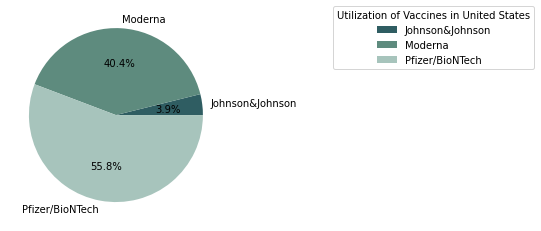

In [65]:
main1('country_vaccinations_by_manufacturer.csv')

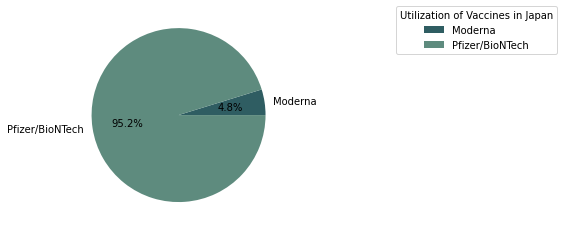

In [66]:
main2('country_vaccinations_by_manufacturer.csv')

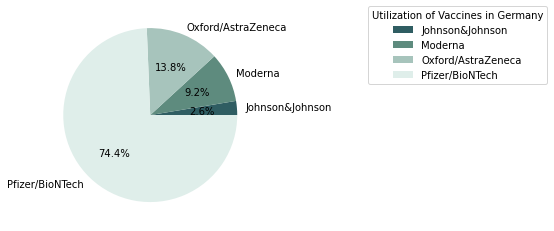

In [67]:
main3('country_vaccinations_by_manufacturer.csv')

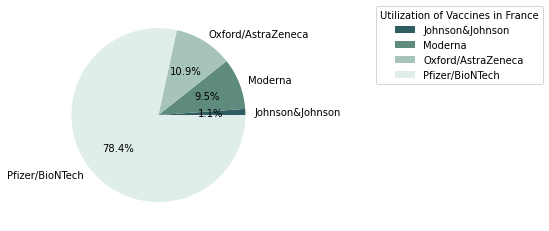

In [68]:
main4('country_vaccinations_by_manufacturer.csv')

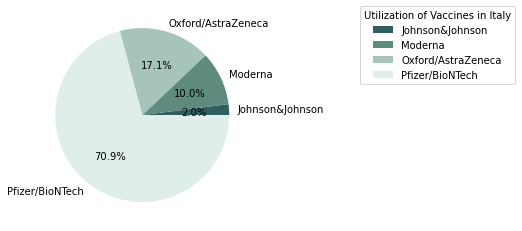

In [69]:
main5('country_vaccinations_by_manufacturer.csv')

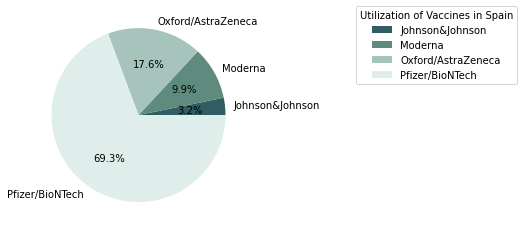

In [70]:
main6('country_vaccinations_by_manufacturer.csv')

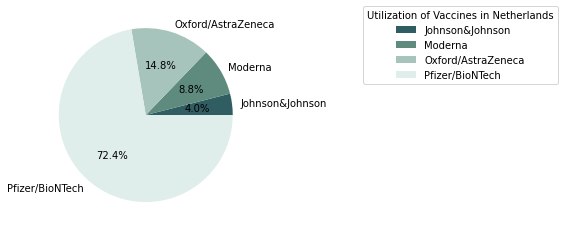

In [71]:
main7('country_vaccinations_by_manufacturer.csv')

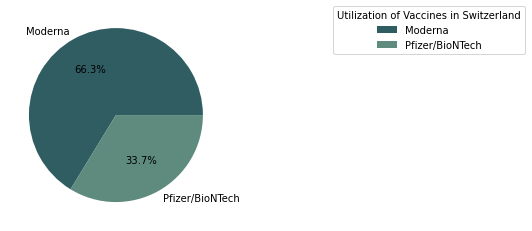

In [72]:
main8('country_vaccinations_by_manufacturer.csv')

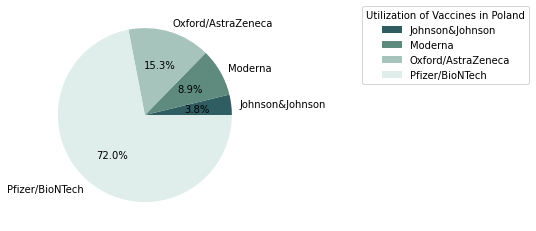

In [73]:
main9('country_vaccinations_by_manufacturer.csv')

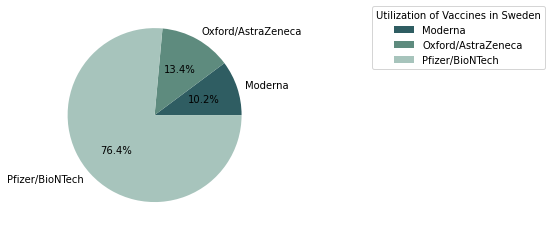

In [74]:
main10('country_vaccinations_by_manufacturer.csv')

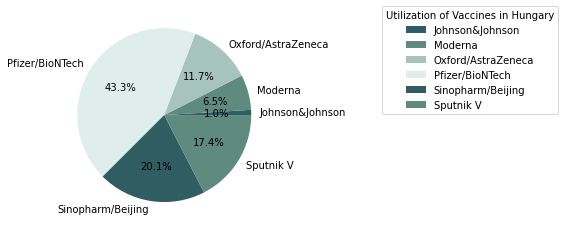

In [75]:
main11('country_vaccinations_by_manufacturer.csv')

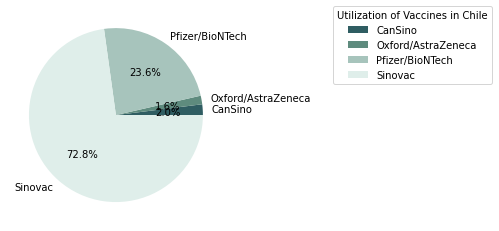

In [76]:
main12('country_vaccinations_by_manufacturer.csv')

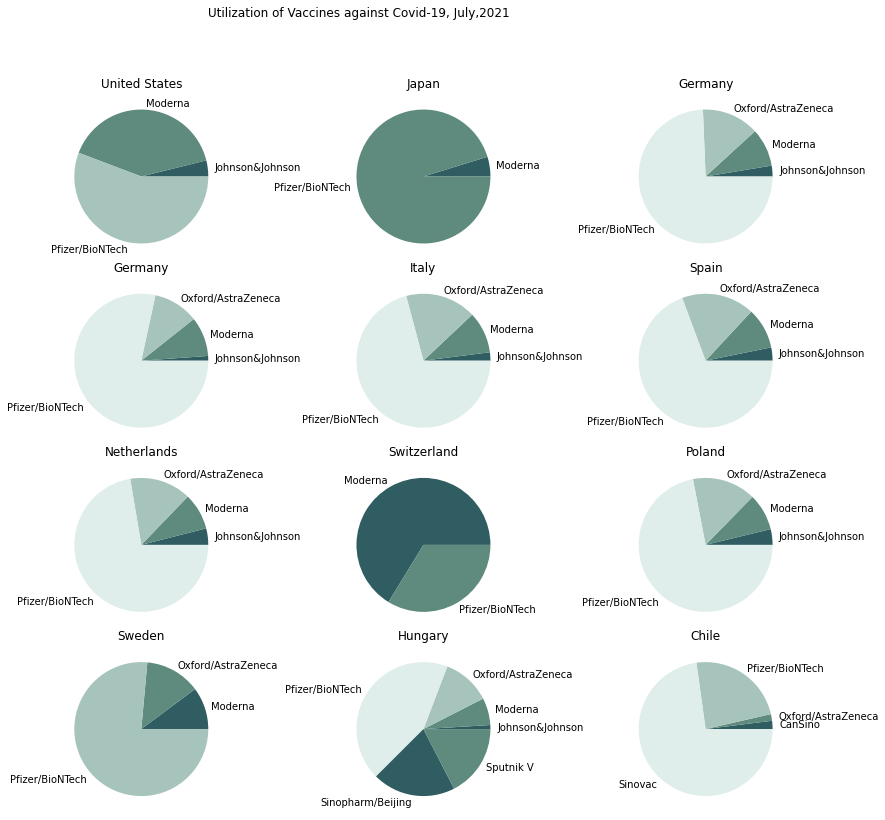

In [77]:
main13('country_vaccinations_by_manufacturer.csv')

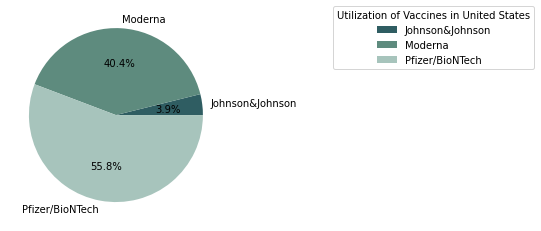

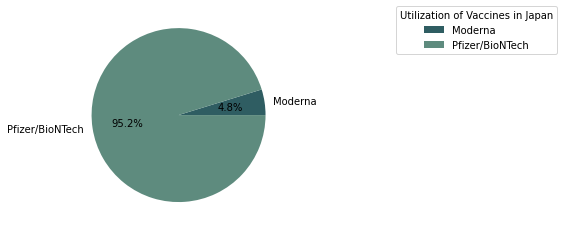

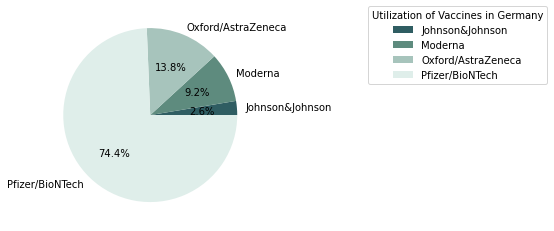

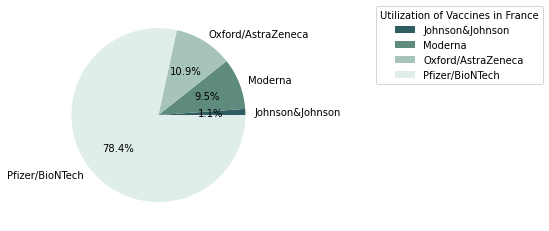

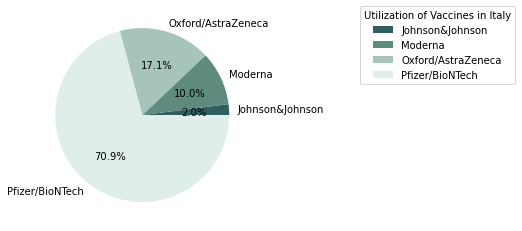

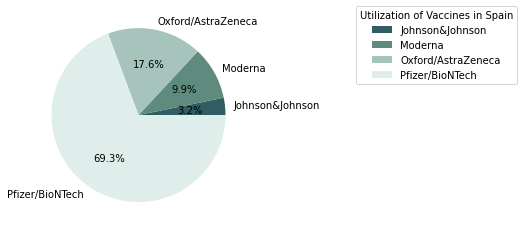

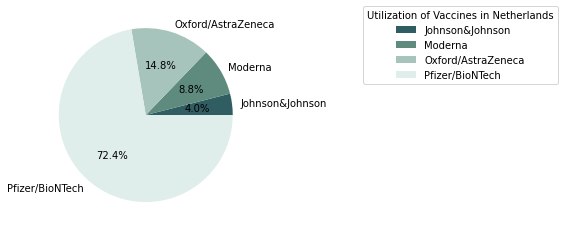

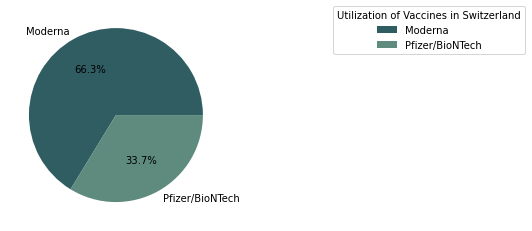

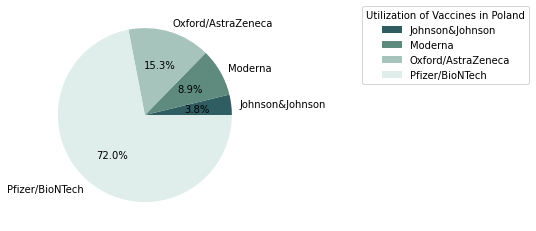

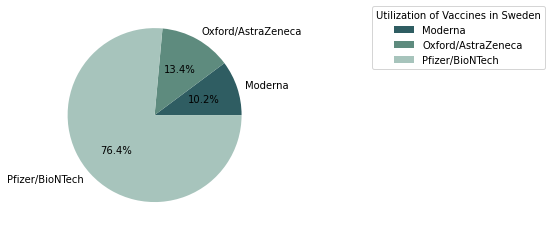

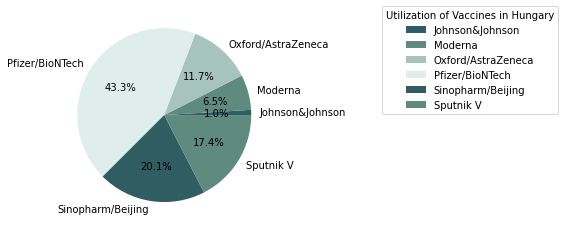

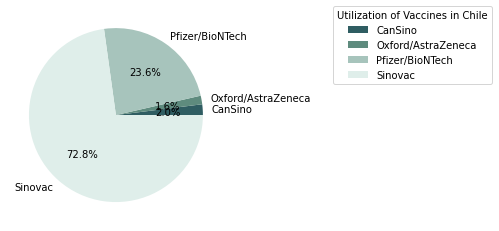

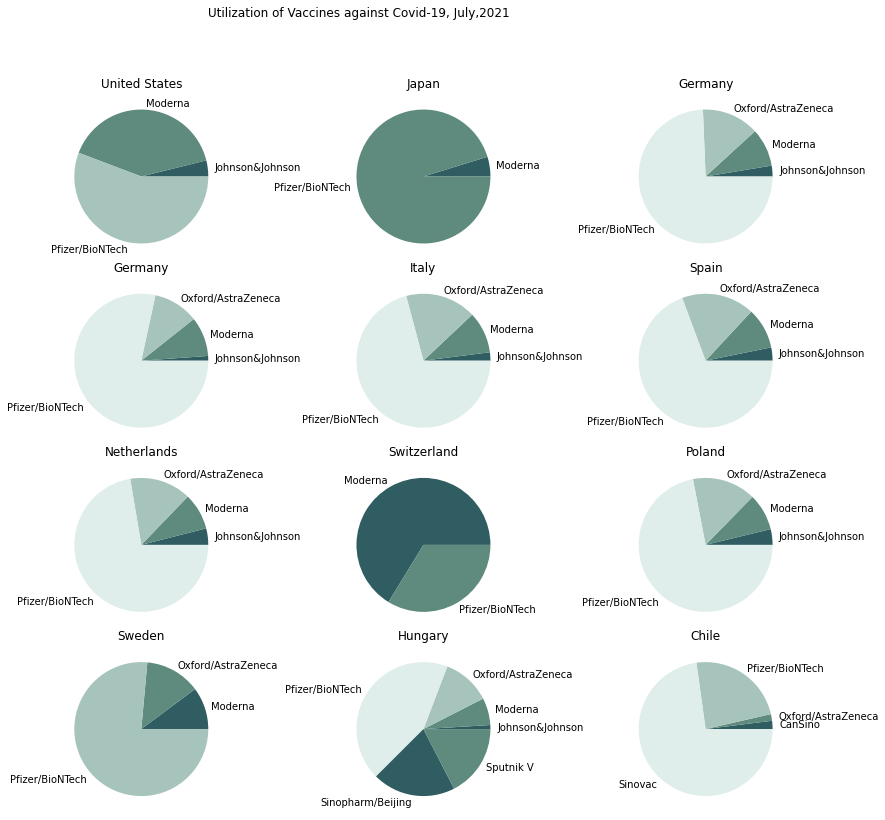

28 of 28 tests passed


In [78]:
start_testing()

# Examples and tests for main1
expect(main1('country_vaccinations_by_manufacturer.csv'),None)

# Examples and tests for main2
expect(main2('country_vaccinations_by_manufacturer.csv'),None)

# Examples and tests for main3
expect(main3('country_vaccinations_by_manufacturer.csv'),None)

# Examples and tests for main4
expect(main4('country_vaccinations_by_manufacturer.csv'),None)

# Examples and tests for main5
expect(main5('country_vaccinations_by_manufacturer.csv'),None)

# Examples and tests for main6
expect(main6('country_vaccinations_by_manufacturer.csv'),None)

# Examples and tests for main7
expect(main7('country_vaccinations_by_manufacturer.csv'),None)

# Examples and tests for main8
expect(main8('country_vaccinations_by_manufacturer.csv'),None)

# Examples and tests for main9
expect(main9('country_vaccinations_by_manufacturer.csv'),None)

# Examples and tests for main10
expect(main10('country_vaccinations_by_manufacturer.csv'),None)

# Examples and tests for main11
expect(main11('country_vaccinations_by_manufacturer.csv'),None)

# Examples and tests for main12
expect(main12('country_vaccinations_by_manufacturer.csv'),None)

# Examples and tests for main13
expect(main13('country_vaccinations_by_manufacturer.csv'),None)

# Examples and tests for read
expect(read('country_vaccinations_by_manufacturer-test1.csv'),[MAustria,PBulgaria,CSChile,SChile])
expect(read('country_vaccinations_by_manufacturer-test2.csv'),[JFrance,AGermany,SBHungary,SVHungary])
expect(read('country_vaccinations_by_manufacturer-test3.csv'),[PItaly,MIceland,SUruguay])

# Examples and tests for analyze
expect(organize_vaccines_use_rate(number_of_vaccines_use(list_usa(read('country_vaccinations_by_manufacturer.csv')))),[13228307, 137826515, 190468171])
expect(organize_vaccines_use_rate(number_of_vaccines_use(list_jap(read('country_vaccinations_by_manufacturer.csv')))),[3777289, 75606370])
expect(organize_vaccines_use_rate(number_of_vaccines_use(list_ger(read('country_vaccinations_by_manufacturer.csv')))),[2341881, 8262012, 12400491, 66732711])
expect(organize_vaccines_use_rate(number_of_vaccines_use(list_fra(read('country_vaccinations_by_manufacturer.csv')))),[792855, 6649842, 7614613, 54633200])
expect(organize_vaccines_use_rate(number_of_vaccines_use(list_ita(read('country_vaccinations_by_manufacturer.csv')))),[1324268, 6610503, 11269277, 46683906])
expect(organize_vaccines_use_rate(number_of_vaccines_use(list_spa(read('country_vaccinations_by_manufacturer.csv')))),[1666696, 5152891, 9189983, 36150581])
expect(organize_vaccines_use_rate(number_of_vaccines_use(list_net(read('country_vaccinations_by_manufacturer.csv')))),[756162, 1683018, 2827011, 13781954])
expect(organize_vaccines_use_rate(number_of_vaccines_use(list_swi(read('country_vaccinations_by_manufacturer.csv')))),[5822813, 2965356])
expect(organize_vaccines_use_rate(number_of_vaccines_use(list_pol(read('country_vaccinations_by_manufacturer.csv')))),[1282313, 3008136, 5192949, 24349968])
expect(organize_vaccines_use_rate(number_of_vaccines_use(list_swe(read('country_vaccinations_by_manufacturer.csv')))),[1001552, 1314107, 7515982])
expect(organize_vaccines_use_rate(number_of_vaccines_use(list_hun(read('country_vaccinations_by_manufacturer.csv')))),[100396, 680148, 1215776, 4498547, 2086559, 1812976])
expect(organize_vaccines_use_rate(number_of_vaccines_use(list_chi(read('country_vaccinations_by_manufacturer.csv')))),[503032, 404463, 5980645, 18449253])

summary()  